IA & Data science (LU3IN0226) -- 2024-2025
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*


# Mini-projet final

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

- Ekaterina BOGUSH
- Amélie CHU

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et <u>**un seul rendu sur un des deux comptes Moodle doit être fait**</u>.

Les groupes de plus de 2 personnes ne sont pas autorisés.

**La dernière séance de TD-TME11 de votre groupe sera réservée pour travailler sur ce mini-projet.**

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

**Nom à donner au fichier à poster** : *projet-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Le compte-rendu est soumis sur la page Moodle.**

# Projet 2 - avril-mai 2025


<font size="+1" color="RED"><b>Date de rendu : au plus tard le lundi 19 mai 2025, avant 11h</b></font>
    
<b>Attention! le site Moodle ferme à 11h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...
<b>Il n'y aura pas de prolongation possible.</b>

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.



## Travail à faire

Appliquer les algorithmes d'apprentissage vus en cours sur les données comme décrit ci-dessous afin de mettre en évidence des résultats intéressants.


## Compte-rendu demandé
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce **notebook** complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre **librairie iads** sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un **poster** sous la forme d'un fichier PDF dont le nom est de la forme: *tme11-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les <u>fichiers de données ne doivent pas être inclus dans votre archive</u> ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et **seulement** les fichiers demandés.
- **Tous les fichiers demandés doivent être soumis avant la date limite*, le jour de la soutenance, vous pourrez fournir des versions (légèrement) modifiées.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mardi 20 mai 2025**</font>, à partir de 9h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille (la remise d'un compte-rendu avant lundi 19 mai 11h est obligatoire pour être autorisé à passer une soutenance).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.


**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- MiniProjet/
              -- ce_notebook.ipynb

Les données seront chargées par les commandes de chargement des données fournies dans ce notebook (ci-dessous).

Dans le notebook que vous rendrez, le chargement des fichiers de données doit considérer cette arborescence.



In [3]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from unidecode import unidecode 
%matplotlib inline  

# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# Pour mesurer le temps
import time

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire père du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as classif

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# sparse matrix
from scipy.sparse import csr_array
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer

sns.set_theme()

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Données pour le projet : 20newsgroups

Les données sont fournies dans le fichier CSV `20newsgroups.csv` contenu dans l'archive. Une documentation sur ces données peut être consultée sur la <a href="http://qwone.com/~jason/20Newsgroups/" target="NEW">page ScikitLearn</a>.
Ces données sont des dépêches issues de 20 groupes de discussions.


### Chargement des données

In [113]:
newsgroups_df = pd.read_csv("data/20newsgroups.csv")

Text(0.5, 1.0, 'Class distribution')

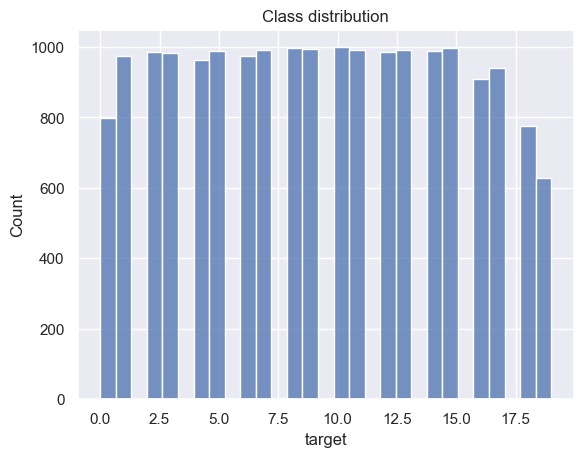

In [114]:
ax = sns.histplot(newsgroups_df["target"])
ax.set_title("Class distribution")

In [116]:
# # Sampling with preserving target distribution
# newsgroups_df = newsgroups_df.groupby("target").sample(frac=0.1)
# ax = sns.histplot(newsgroups_df["target"])
# ax.set_title("Class distribution")

# newsgroups_df["target"].unique()
# newsgroups_df["target"].value_counts(normalize=True).sort_index()

### Prétraitement

Dans un premier temps, vous devez appliquer les étapes de prétraitements vues dans le TME 6. Pour le nettoyage, la liste des mots inutiles (stopwords) est fournie dans le fichier `stopwords.csv` de l'archive

In [117]:
stop_words_df = pd.read_csv("data/stopwords.csv")
stopwords = stop_words_df["stopword"].values.tolist()
stop_words_df

,stopword
0,a
1,about
2,above
3,after
4,again
...,...
193,you're
194,yours
195,yourself
196,yourselves


In [118]:
# Delete nans
print("Number of Nans", newsgroups_df[newsgroups_df["messages"].isna()].shape[0])
newsgroups_df = newsgroups_df[~newsgroups_df["messages"].isna()]

Number of Nans 380


1. Mettre toutes les lettre en miniscules
2. Enlever punctuation (sauf ')
3. Enlever stopwords ***si nécessaire***
4. Enlever les mots qui ne contient que les chiffres

In [119]:
def clean_str(news:pd.DataFrame, stopwords:list[str], delete_stopwords:bool=True, delete_digits:bool=True) -> pd.DataFrame:
    """
    Fait un prétraitement de la base de données 'news' :
        1. Supprime les NaNs
        2. Convertit unicode en ascii
        3. Supprime '\n \r \t' et toute la punctuation sauf '
        4. Supprime les stopwords [si nécessaire]
        5. Supprime les chiffres qui sont seuls (sans lettres à coté) [si nécessaire]
    
    Parameters
    ----------
        news : Database qui contient la base de données sur 'news'. Colonne 'messages' doit être présent.
        stopwords : Liste des stopwords
        delete_stopwords : Si True, alors les stopwords seront enlevés. Si False, ils seront préservés.
        
    Returns
    -------
        Dataframe 'news' nettoyé selon les 4 étapes ci-dessus
            (et avec la colonne 'Message index' ajouté --> TO DO : see if useful later. If not, delete).
    """

    def del_stopwords(tokenized_msg:list[str]) -> list[str]:
        return [word for word in tokenized_msg if word not in stopwords and word != "\'"]

    def del_digits(tokenized_msg:list[str]) -> list[str]:
        return [word for word in tokenized_msg if not word.isdigit()]
     
    # To be able to implode afterwards if necessary --> see later if it is useful
    news = news.reset_index().rename(columns={"index":"Message index"})

    # Delete NaNs
    print("Number of Nans", news["messages"].isna().size)
    news.loc[:, "messages"] = news[~news["messages"].isna()]

    # Convert unicode to ascii. Delete \n \r \t
    news.loc[:, "messages"] = news["messages"].apply(unidecode).str.replace(r'[\n\r\t]', '', regex=True)
    
    # Delete all punctuation but '
    punc = punctuation.replace('\'', '')
    trans_table = str.maketrans(punc, ' ' * len(punc))
    news.loc[:, "messages"] = news["messages"].str.lower().str.translate(trans_table).str.split()

    # Delete stopwords if necessary
    if delete_stopwords:
        news.loc[:, "messages"] = news["messages"].apply(del_stopwords)
    
    if delete_digits:
        news.loc[:, "messages"] = news["messages"].apply(del_digits)

    return news

def get_corpus(news:pd.DataFrame) -> list[str]:
    return news["messages"].explode().unique()

def get_bow_vect(news:pd.DataFrame, corpus:list[str], binary=False) -> csr_array:
   vectorizer = CountVectorizer(vocabulary=corpus, binary=binary)
   return vectorizer.transform(news["messages"])

def get_tfidf_vect(news:pd.DataFrame, corpus:list[str]) -> csr_array:
    vectorizer = TfidfVectorizer(vocabulary=corpus)
    return vectorizer.fit_transform(news["messages"])

### Lemmatisation et le tri supplémentaire

In [120]:
news_no_stopwords = clean_str(newsgroups_df, stopwords, delete_stopwords=True, delete_digits=True)

words = news_no_stopwords.explode("messages")
words = words[~words["messages"].isna()]

wnl = WordNetLemmatizer()
unique_words = pd.DataFrame(data={"word":words["messages"].unique()})
unique_words["lemma"] = unique_words["word"].apply(wnl.lemmatize)
words = words.merge(unique_words, left_on="messages", right_on="word").drop(columns="word")

# Min length = 3
words = words[words["lemma"].apply(len) > 2] 

# Min count = 10
count = words["lemma"].value_counts()
words = words[words["lemma"].isin(count[count >= 10].index)]

corpus = words["lemma"].unique()
messages = words.groupby("Message index")["lemma"].apply(" ".join).reset_index()

news_no_stopwords = news_no_stopwords[["Message index", "target"]].merge(messages, on="Message index").rename(columns={"lemma":"messages"})
news_no_stopwords

Number of Nans 18466


,Message index,target,messages
0,0,10,sure pen fan pretty confused lackof kind post ...
1,1,3,brother market high performance video card loc...
2,2,17,finally said dream mediterranean new area grea...
3,3,3,think scsi card dma transfer disk scsi card dm...
4,4,4,old drive cannot use new system understanding ...
...,...,...,...
18265,18841,13,edu david consultation cheaper scan also bette...
18266,18842,12,isolated ground usually unusual color yellow o...
18267,18843,3,installed dx2 cpu clone motherboard tried moun...
18268,18844,1,require sphere space point sphere far see unle...


### Naïf Bayes

In [ ]:
# from copy import deepcopy

# class NaiveBayes(classif.Classifier):
#     """Classifier Naive Bayes (optimisé pour les matrices creuses). Lissage de Laplace est utilisé avec alpha = 1, K = 2 
#     pour éviter le problème de fréquence nulle.
#     Source : https://towardsdatascience.com/laplace-smoothing-in-naive-bayes-algorithm-9c237a8bdece/."""

#     def __init__(self, input_dimension, corpus, classes):
#         """Initialise les paramètres de Naive Bayes.
#         Les dictionnaires supplémentaires du classifieur:
#             - probas_words : Dictionnaire qui stocke les probas P(mot | target). Le dictionnaire est sous la forme
#                 {target_value : [P(mot 0 | target), ..., P(mot N | target)]}.

#             - probas_class : Dictionnaire qui stocke les probas P(target).

#         Parameters
#         ----------
#             input_dimension : dimension des données (= nombre de mots dans le corpus)
#             corpus : le corpus
#             classes : les classes (uniques) qui seront présents dans le dataset.
#         """

#         super().__init__(input_dimension)
#         self.probas_words = dict()
#         self.probas_class = dict()
#         self.classes = deepcopy(classes)
#         self.corpus = deepcopy(corpus)
    
#     def train(self, desc_set:csr_array, label_set:np.ndarray):
#         """Calcule les probas P(mot | target) pour chaque target.
#         Remplie le dictionnaire self.probas_words et self.probas_class.

#         Parameters
#         ----------
#             desc_set : Les exemples de dataset déjà vectorisées comme Bag-of-Words !non! binaire.
#             label_set : les labels (targets) associés aux exemples de 'desc_set'.
#         """
        
#         for cl in self.classes:
#             mask = (label_set == cl)
#             examples = desc_set[mask, :]
            
#             # P(mot | target) avec lissage de Laplace (alpha = 1, K = 2)
#             self.probas_words[cl] = (examples.sum(axis=0).A1 + 1) / (examples.sum() + 2)

#             # P(target)
#             self.probas_class[cl] = examples.shape[0] / desc_set.shape[0]                
    
#     def _get_mask(self, example:csr_array) -> csr_array:
#         """Calcule le vecteur similaire à bag-of-words pour un example.
        
#         Parameters
#         ----------
#             example : Example de dataset déjà vectorisé comme Bag-of-Words !non! binaire
        
#         Returns
#         -------
#             Masque dont chaque colonne est associé à un mot (même ordre des mots que dans 'example').
#             Le masque aura 0 si le mot n'est pas présent dans 'example' et 1 si le mot est présent.
#             Ce masque est utilisé pour faire la puissance lors de prédiction selon Naive Bayes (Xmot dans le cours).
#         """

#         mask = example.copy()
#         mask.data = (mask.data > 0).astype(int)
#         return mask

#     def score(self, example:csr_array) -> dict[int, float]:
#         """Calcule P(target | example) pour chaque target présent dans self.classes
        
#         Parameters
#         ----------
#             example : Example de dataset déjà vectorisé comme Bag-of-Words !non! binaire
        
#         Returns
#         -------
#             Dictionnaire dont chaque clé est une valeur de target et la valeur associée est la probabilité 
#             P(target | example).
#         """

#         mask = self._get_mask(example).toarray().flatten()
#         scores = dict()

#         for cl in self.classes:
#             pow1 = np.power(self.probas_words[cl], mask)
#             pow0 = np.power(1-self.probas_words[cl], 1-mask)
#             scores[cl] = np.prod(pow1) * np.prod(pow0) * self.probas_class[cl]
#         return scores

#     def predict(self, example:csr_array):
#         """Prédit le classe d'example selon les probabilités P(classe | example). 
#         Le classe prédit est celui qui a la probabilité la plus élevée.
        
#         Parameters
#         ----------
#             example : Example de dataset déjà vectorisé comme Bag-of-Words !non! binaire
        
#         Returns
#         -------
#             Classe le plus probable d'example donné.
#         """

#         scores = self.score(example)
        
#         return max(scores, key=scores.get)

In [ ]:
news_labels = news_no_stopwords["target"].values
# !Important! BoW non binaire
news_desc = get_bow_vect(news_no_stopwords, corpus, binary=False)

bayes = classif.NaiveBayes(news_desc.shape[1], corpus, np.unique(news_labels))

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(classifier_knn, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")


In [128]:
bayes.get_mask(news_desc[0, :])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51 stored elements and shape (1, 14732)>

In [126]:
print(bayes.accuracy(test_desc, test_label))

0.5684499314128943


In [112]:
print(np.where((predictions == test_label) & (test_label == 0))[0].size / test_label[test_label == 0].size)
print(np.where((predictions == test_label) & (test_label == 1))[0].size / test_label[test_label == 1].size)
# (test_label == 1).size
indices = np.argwhere(test_label == 1).flatten()
predictions[indices]

0.9946178686759957
0.8053691275167785


array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Apprentissage supervisé
**Remarque** : les classifieurs KNN multi-classe et Perceptron sans biais ont été optimisés pour les matrices creuses *(sparse array)* de ***scipy***

### Dataset : **sans** stopwords

#### **Bag-of-words binaire**

In [64]:
news_labels = news_no_stopwords["target"].values
n_classes = news_no_stopwords["target"].nunique()

# BoW binaire
news_desc = get_bow_vect(news_no_stopwords, corpus, binary=True)
news_desc.shape

(1820, 2804)

##### KNN multi-classe [distance **euclidienne**]

Results [0.09859154929577464, 0.09295774647887324, 0.09859154929577464, 0.10422535211267606, 0.07323943661971831]
Mean accuracy 0.0935, std : 0.0107
Time 0.9881980419158936


Text(0.5, 1.0, 'Confusion matrix')

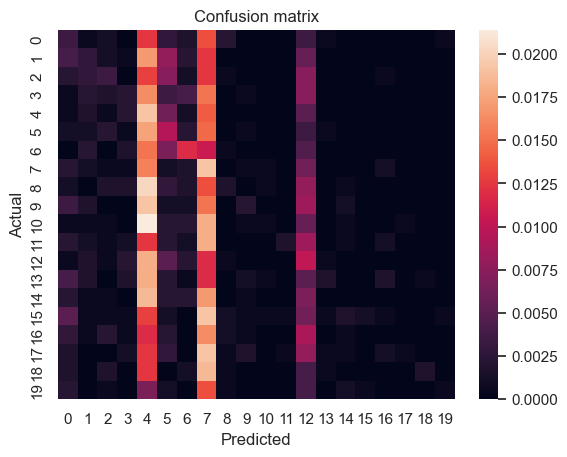

In [67]:
classifier_knn = classif.ClassifierKNN_MC(news_desc.shape[1], k=10, C=n_classes, dist_type="euclidean")

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(classifier_knn, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### KNN multi-classe [distance **cosinus**]

Results [0.4028169014084507, 0.4140845070422535, 0.38591549295774646, 0.36338028169014086, 0.35492957746478876]
Mean accuracy 0.3842, std : 0.0225
Time 1.201958179473877


Text(0.5, 1.0, 'Confusion matrix')

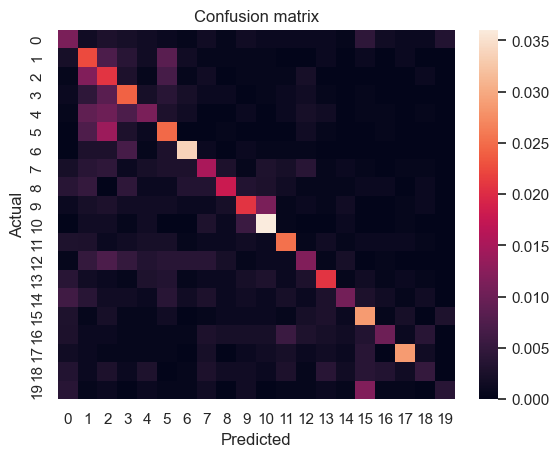

In [68]:
classifier_knn = classif.ClassifierKNN_MC(news_desc.shape[1], k=10, C=n_classes, dist_type="cosine")

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(classifier_knn, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### Perceptron

Results [0.4704225352112676, 0.49577464788732395, 0.5183098591549296, 0.4619718309859155, 0.4704225352112676]
Mean accuracy 0.4834, std : 0.0208
Time 26.79119062423706


Text(0.5, 1.0, 'Confusion matrix')

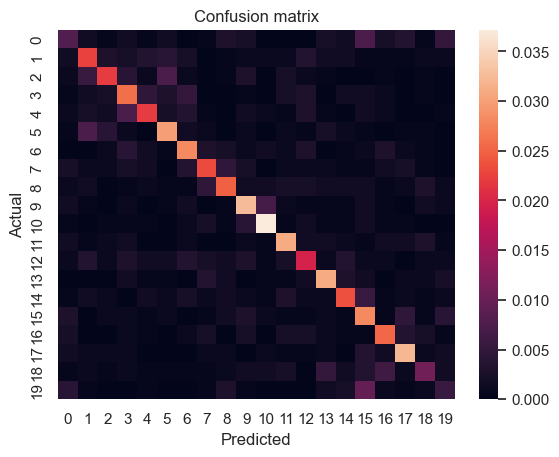

In [69]:
classifier_perc = classif.ClassifierPerceptron(news_desc.shape[1], 0.01, init=False, sparse=True)
perc_mcc = classif.ClassifierMultiOAA(classifier_perc, classes = np.unique(news_labels))

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(perc_mcc, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### Arbre de décision

------ affichage validation croisée
Itération 0: taille de base app.=1465	taille base test=355	Taux de bonne classif: 0.2873
Itération 1: taille de base app.=1465	taille base test=355	Taux de bonne classif: 0.2676
Itération 2: taille de base app.=1465	taille base test=355	Taux de bonne classif: 0.2704
Itération 3: taille de base app.=1465	taille base test=355	Taux de bonne classif: 0.3042
Itération 4: taille de base app.=1465	taille base test=355	Taux de bonne classif: 0.2507
------ fin affichage validation croisée
Results [0.28732394366197184, 0.2676056338028169, 0.2704225352112676, 0.30422535211267604, 0.2507042253521127]
Mean accuracy 0.2761, std : 0.0183
Time 314.8222641944885


Text(0.5, 1.0, 'Confusion matrix')

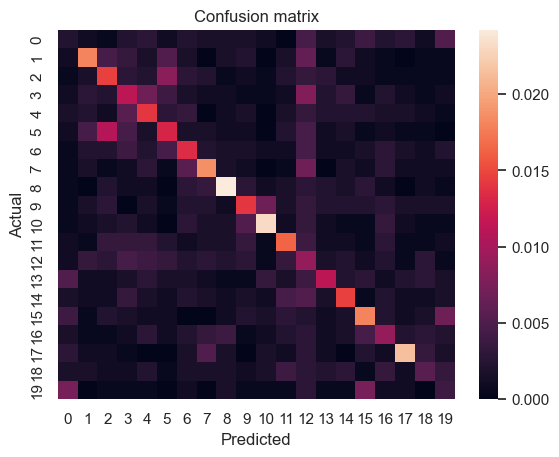

In [71]:
tree_decision = classif.ClassifierArbreDecision(news_desc.shape[1], epsilon=0.0)

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(tree_decision, (news_desc.toarray(), news_labels), 5, True, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

#### **Bag-of-words avec fréquence**

In [73]:
news_labels = news_no_stopwords["target"].values
n_classes = news_no_stopwords["target"].nunique()

# BoW binaire
news_desc = get_bow_vect(news_no_stopwords, corpus, binary=False)
news_desc.shape

(1820, 2804)

##### KNN multi-classe [distance **euclidienne**]

Results [0.2084507042253521, 0.13802816901408452, 0.17183098591549295, 0.2084507042253521, 0.1323943661971831]
Mean accuracy 0.1718, std : 0.0328
Time 0.9433097839355469


Text(0.5, 1.0, 'Confusion matrix')

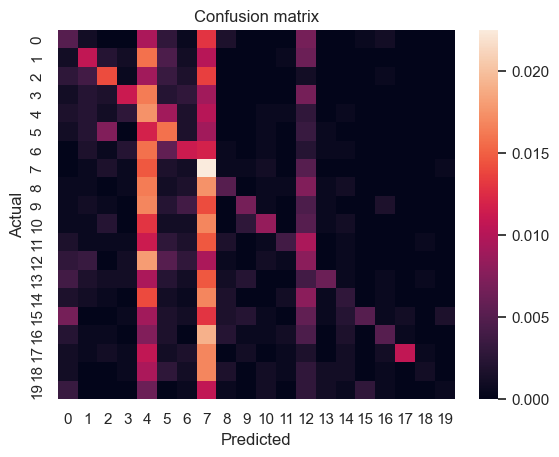

In [74]:
classifier_knn = classif.ClassifierKNN_MC(news_desc.shape[1], k=10, C=n_classes, dist_type="euclidean")

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(classifier_knn, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### KNN multi-classe [distance **cosinus**]

Results [0.39436619718309857, 0.4225352112676056, 0.447887323943662, 0.4084507042253521, 0.38591549295774646]
Mean accuracy 0.4118, std : 0.0219
Time 1.2263212203979492


Text(0.5, 1.0, 'Confusion matrix')

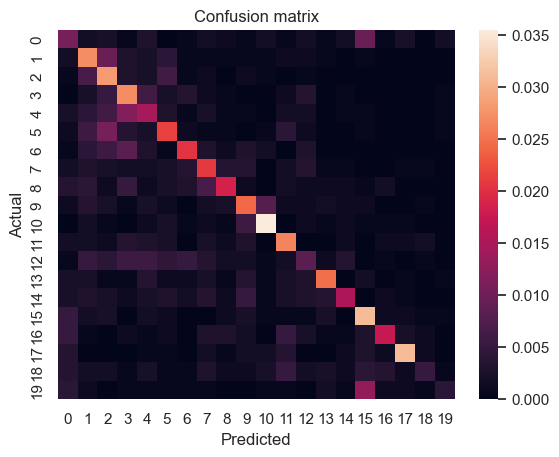

In [75]:
classifier_knn = classif.ClassifierKNN_MC(news_desc.shape[1], k=10, C=n_classes, dist_type="cosine")

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(classifier_knn, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### Perceptron

Results [0.4732394366197183, 0.5126760563380282, 0.4788732394366197, 0.4676056338028169, 0.4225352112676056]
Mean accuracy 0.4710, std : 0.0289
Time 36.077417850494385


Text(0.5, 1.0, 'Confusion matrix')

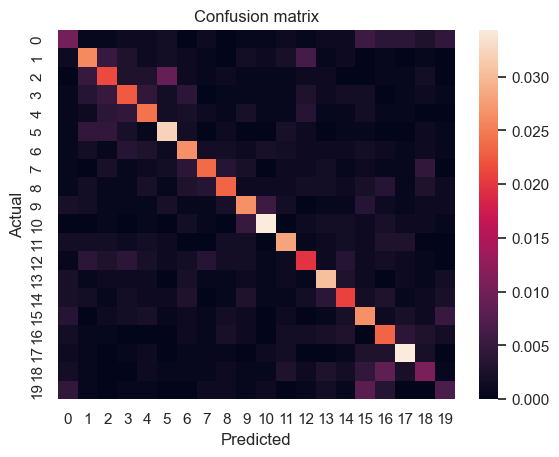

In [76]:
classifier_perc = classif.ClassifierPerceptron(news_desc.shape[1], 0.01, init=False, sparse=True)
perc_mcc = classif.ClassifierMultiOAA(classifier_perc, classes = np.unique(news_labels))

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(perc_mcc, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### Arbre numérique

In [78]:
tree_numerical = classif.ClassifierArbreNumerique(news_desc.shape[1], epsilon=0.0)

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(tree_numerical, (news_desc.toarray(), news_labels), 5, True, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

------ affichage validation croisée
Itération 0: taille de base app.=1465	taille base test=355	Taux de bonne classif: 0.2930


KeyboardInterrupt: 

### **Vectorisation avec TF-IDF**

In [80]:
news_labels = news_no_stopwords["target"].values
n_classes = news_no_stopwords["target"].nunique()

# BoW binaire
news_desc = get_tfidf_vect(news_no_stopwords, corpus)
news_desc.shape

(1820, 2804)

##### KNN multi-classe [distance **euclidienne**]

Results [0.4676056338028169, 0.49859154929577465, 0.5549295774647888, 0.48169014084507045, 0.48169014084507045]
Mean accuracy 0.4969, std : 0.0306
Time 0.7673118114471436


Text(0.5, 1.0, 'Confusion matrix')

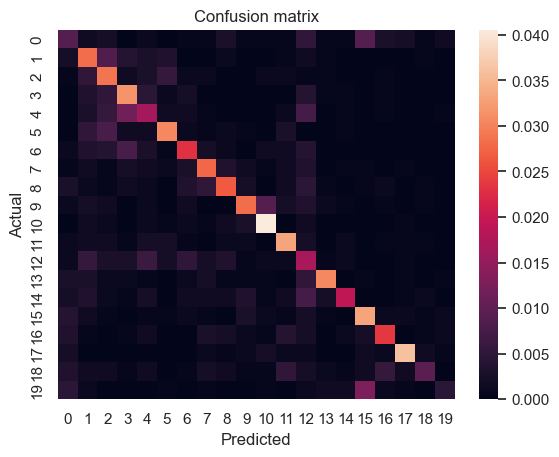

In [81]:
classifier_knn = classif.ClassifierKNN_MC(news_desc.shape[1], k=10, C=n_classes, dist_type="euclidean")

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(classifier_knn, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### KNN multi-classe [distance **cosinus**]

Results [0.4619718309859155, 0.504225352112676, 0.5492957746478874, 0.5014084507042254, 0.48450704225352115]
Mean accuracy 0.5003, std : 0.0288
Time 1.0444412231445312


Text(0.5, 1.0, 'Confusion matrix')

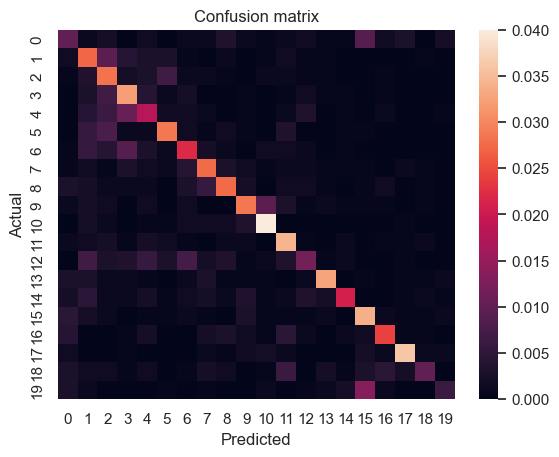

In [82]:
classifier_knn = classif.ClassifierKNN_MC(news_desc.shape[1], k=10, C=n_classes, dist_type="cosine")

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(classifier_knn, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### Perceptron

Results [0.523943661971831, 0.523943661971831, 0.5267605633802817, 0.504225352112676, 0.5014084507042254]
Mean accuracy 0.5161, std : 0.0109
Time 24.91334295272827


Text(0.5, 1.0, 'Confusion matrix')

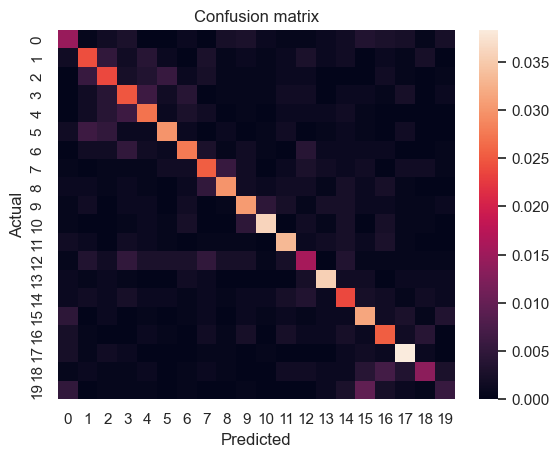

In [83]:
classifier_perc = classif.ClassifierPerceptron(news_desc.shape[1], 0.01, init=False, sparse=True)
perc_mcc = classif.ClassifierMultiOAA(classifier_perc, classes = np.unique(news_labels))

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(perc_mcc, (news_desc, news_labels), 5, False, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

##### Arbre numérique

In [84]:
tree_numerical = classif.ClassifierArbreNumerique(news_desc.shape[1], epsilon=0.0)

start = time.time()
(res_all, res_mean, res_std, conf_matrix_mean) = ev.validation_croisee(tree_numerical, (news_desc.toarray(), news_labels), 5, True, True)
end = time.time()

print("Results", res_all)
print(f"Mean accuracy {res_mean:.4f}, std : {res_std:.4f}")
print("Time", end - start)
ax = sns.heatmap(conf_matrix_mean)
ax.set_title("Confusion matrix")

------ affichage validation croisée


KeyboardInterrupt: 

## Tâches à réaliser

### Apprentissage supervisé

*Tâches*: évaluation d'algorithmes et de représentations des données.
- classification binaire
- classification multi-classe

*Etudes suggérées*:
- représentations des données
    - avec ou sans suppression des stopwords
    - différentes représentations: bag-of-words binaire, avec comptage, avec fréquences, avec tfidf
- différents classifiers:
    - perceptron,
    - k-plus proches voisins avec distance euclidienne,
    - k-plus proches voisins avec distance cosinus (cf. TD),
    - Naives Bayes,
    - arbres de décision
- analyse des résultats:
    - accuracy, temps d'exécutions
    - score fold par fold
    - matrice de confusion


### Apprentissage non-supervisé

*Tâche*: vérifier que le découpage a du sens par rapport aux groupes fournis. 

*Etudes suggérées*:
- étudier l'application d'un clustering hiérarchique et son résultat;
- étudier les résultats de l'application de l'algorithme des k-moyennes, pour différentes valeurs de k;
- proposer des évaluations des clusters trouvés afin de mettre en évidence les plus intéressants:
    - en utilisant les indices d'évaluation présentés en cours;
    - en comparant par diverses méthodes les clusters trouvés avec les vrais labels des classes (targets y).
- proposer une visualisation des résultats obtenus


   


## Poster à rendre dans le compte-rendu (format PDF)

Votre poster doit décrire de façon synthétique **l'ensemble des expérimentations** menées sur les données, les résultats obtenus en apprentissage supervisé et en apprentissage non-supervisé ainsi que les conclusions/bilans que vous tirez de ces expérimentations (ie. ce que vous avez appris sur ces données).

*Remarque*: vous devez indiquer vos noms/prénoms et groupe (1, 2, ou 3) sur le poster.
